In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR, SVC
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, silhouette_score
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression, Ridge, Lasso

data = {
    'تاریخ': [
        '1404/05/19', '1404/05/20', '1404/05/21', '1404/05/22', '1404/05/23',
        '1404/05/24', '1404/05/25', '1404/05/26', '1404/05/27', '1404/05/28',
        '1404/05/29', '1404/05/30', '1404/06/01', '1404/06/02', '1404/06/03',
        '1404/06/04', '1404/06/05', '1404/06/06', '1404/06/07', '1404/06/08',
        '1404/06/09', '1404/06/10', '1404/06/11', '1404/06/12', '1404/06/13',
        '1404/06/14', '1404/06/15', '1404/06/16', '1404/06/17', '1404/06/18'
    ],
    'نام لوله': [
        '100-20-10', '120-20-10', '32-6.3-80', '100-6-100', '80-6.3-10',
        '100-20-11', '120-20-11', '32-6.3-81', '100-6-101', '80-6.3-11',
        '100-20-10', '120-20-10', '32-6.3-80', '100-6-100', '80-6.3-10',
        '100-20-11', '120-20-11', '32-6.3-81', '100-6-101', '80-6.3-11',
        '100-20-10', '120-20-10', '32-6.3-80', '100-6-100', '80-6.3-10',
        '100-20-11', '120-20-11', '32-6.3-81', '100-6-101', '80-6.3-11'
    ],
    'متراژ': [
        200, 3009, 100, 429, 755,
        10023, 422, 522, 997, 216,
        3, 210, 3010, 120, 450,
        9800, 430, 540, 1000, 220,
        5, 250, 3100, 140, 470,
        10500, 440, 550, 1100, 230
    ],
    'وزن': [
        103, 2005, 65, 924, 482,
        4422, 343, 341, 234, 854,
        10, 110, 2050, 75, 460,
        4300, 350, 345, 240, 860,
        15, 130, 2100, 80, 470,
        4450, 360, 355, 250, 870
    ],
    'توقف': [
        2, 10, 0, 6, 2.5,
        0, 0, 1, 3, 2.5,
        0.5, 1.5, 11, 0, 7,
        3, 0, 0.5, 1.2, 3,
        0, 1, 10.5, 0, 6.5,
        2, 0, 0.3, 1.1, 2.7
    ],
    'ضایعات': [
        16, 3, 3, 3, 0,
        5, 0.5, 1, 2.5, 6,
        3.5, 2, 4, 3, 1,
        6, 0.5, 0.8, 2, 5,
        3, 1.5, 3.5, 4, 0,
        5, 1, 0.5, 2, 6
    ],
    'دلیل توقف': [
        'خرابی', 'تعمیرات', 'خاموش کردن', 'قطعی برق', 'نبود سفارش',
        'طبق دستور', 'راه اندازی', 'تمیز کاری', 'خاموش کردن', 'راه اندازی',
        'تمیز کاری', 'خرابی', 'تعمیرات', 'خاموش کردن', 'قطعی برق',
        'نبود سفارش', 'طبق دستور', 'راه اندازی', 'تمیز کاری', 'خاموش کردن',
        'راه اندازی', 'تمیز کاری', 'خرابی', 'تعمیرات', 'خاموش کردن',
        'قطعی برق', 'نبود سفارش', 'طبق دستور', 'راه اندازی', 'تمیز کاری'
    ]
}

df = pd.DataFrame(data)
print("Missing values per column:\n", df.isnull().sum())
def extract_pipe_features(pipe_name):
    try:
        parts = list(map(float, pipe_name.split('-')))
        while len(parts) < 3:
            parts.append(0)
        ratio1 = parts[0] / parts[1] if parts[1] != 0 else 0
        ratio2 = parts[1] / parts[2] if parts[2] != 0 else 0
        return parts + [ratio1, ratio2]
    except:
        return [0, 0, 0, 0, 0]

df[['dim1', 'dim2', 'dim3', 'ratio1', 'ratio2']] = pd.DataFrame(df['نام لوله'].apply(extract_pipe_features).tolist(), index=df.index)
print("\nData summary:\n", df.describe())
numeric_cols = ['متراژ', 'وزن', 'توقف', 'ضایعات', 'dim1', 'dim2', 'dim3', 'ratio1', 'ratio2']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
print("\nAny NaN after numeric conversion?\n", df[numeric_cols].isnull().sum())
df.dropna(inplace=True)
print("\nFinal data shape after cleaning:", df.shape)
print(df.head())

# Function to load data from Excel (use this for real file)
# df = pd.read_excel('your_file.xlsx')

Missing values per column:
 تاریخ        0
نام لوله     0
متراژ        0
وزن          0
توقف         0
ضایعات       0
دلیل توقف    0
dtype: int64

Data summary:
               متراژ          وزن       توقف     ضایعات        dim1       dim2  \
count     30.000000    30.000000  30.000000  30.000000   30.000000  30.000000   
mean    1641.366667   921.766667   2.626667   3.143333   86.400000  11.720000   
std     2993.069045  1309.066940   3.289475   3.045481   30.510145   6.877068   
min        3.000000    10.000000   0.000000   0.000000   32.000000   6.000000   
25%      217.000000   156.000000   0.075000   1.000000   80.000000   6.300000   
50%      445.000000   352.500000   1.350000   3.000000  100.000000   6.300000   
75%      999.250000   867.500000   3.000000   4.000000  100.000000  20.000000   
max    10500.000000  4450.000000  11.000000  16.000000  120.000000  20.000000   

             dim3     ratio1     ratio2  
count   30.000000  30.000000  30.000000  
mean    42.500000   9.08


Pipe with Maximum Total Stoppage:
نام لوله    32-6.3-80
توقف             21.5
ضایعات           10.5
Name: 6, dtype: object

Pipe with Maximum Total Wastes:
نام لوله    100-20-10
توقف              2.5
ضایعات           22.5
Name: 0, dtype: object


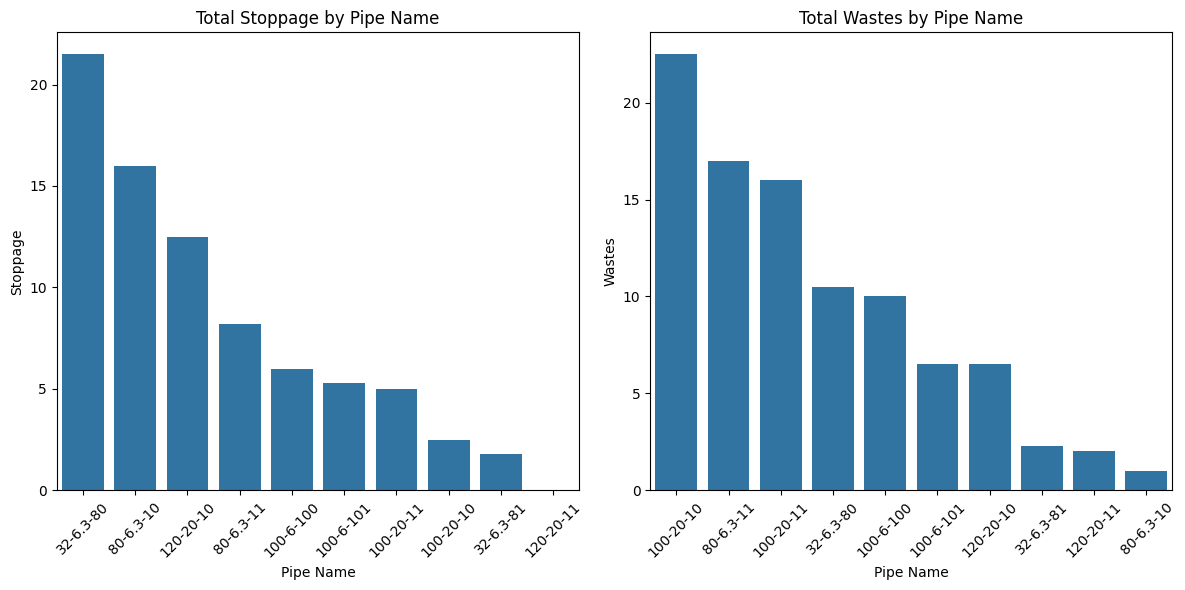

,نام لوله,توقف,ضایعات
0,100-20-10,2.5,22.5
1,100-20-11,5.0,16.0
2,100-6-100,6.0,10.0
3,100-6-101,5.3,6.5
4,120-20-10,12.5,6.5
5,120-20-11,0.0,2.0
6,32-6.3-80,21.5,10.5
7,32-6.3-81,1.8,2.3
8,80-6.3-10,16.0,1.0
9,80-6.3-11,8.2,17.0


In [40]:
def compute_max_stop_and_waste(df):
    grouped = df.groupby('نام لوله').agg({'توقف': 'sum', 'ضایعات': 'sum'}).reset_index()
    max_stop_pipe = grouped.loc[grouped['توقف'].idxmax()]
    max_waste_pipe = grouped.loc[grouped['ضایعات'].idxmax()]
    print("\nPipe with Maximum Total Stoppage:")
    print(max_stop_pipe)
    print("\nPipe with Maximum Total Wastes:")
    print(max_waste_pipe)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.barplot(x='نام لوله', y='توقف', data=grouped.sort_values('توقف', ascending=False))
    plt.title('Total Stoppage by Pipe Name')
    plt.ylabel('Stoppage')
    plt.xlabel('Pipe Name')
    plt.xticks(rotation=45)
    plt.subplot(1, 2, 2)
    sns.barplot(x='نام لوله', y='ضایعات', data=grouped.sort_values('ضایعات', ascending=False))
    plt.title('Total Wastes by Pipe Name')
    plt.ylabel('Wastes')
    plt.xlabel('Pipe Name')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    return grouped
compute_max_stop_and_waste(df)

In [41]:
def extract_pipe_features(pipe_name):
    try:
        parts = list(map(float, pipe_name.split('-')))
        return parts + [0] * (3 - len(parts))
    except:
        return [0, 0, 0]
def prepare_data(df):
    df['dim1'], df['dim2'], df['dim3'] = zip(*df['نام لوله'].apply(extract_pipe_features))
    le = LabelEncoder()
    df['دلیل توقف_encoded'] = le.fit_transform(df['دلیل توقف'])
    features = ['متراژ', 'وزن', 'dim1', 'dim2', 'dim3']
    X = df[features]
    y_reg_stop = df['توقف']  
    y_reg_waste = df['ضایعات'] 
    y_clf = df['دلیل توقف_encoded'] 
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, y_reg_stop, y_reg_waste, y_clf, le
X, y_reg_stop, y_reg_waste, y_clf, le = prepare_data(df)


Model: LinearRegression - Target: Stoppage
Mean Squared Error (MSE): 7.1012
Mean Absolute Error (MAE): 2.3581
R2 Score: -3.1874
Best Parameters: {}
--------------------------------------------------

Model: Ridge - Target: Stoppage
Mean Squared Error (MSE): 6.7563
Mean Absolute Error (MAE): 2.1697
R2 Score: -2.9840
Best Parameters: {'alpha': 10.0}
--------------------------------------------------

Model: Lasso - Target: Stoppage
Mean Squared Error (MSE): 4.8492
Mean Absolute Error (MAE): 1.7090
R2 Score: -1.8595
Best Parameters: {'alpha': 1.0}
--------------------------------------------------

Model: KNeighborsRegressor - Target: Stoppage
Mean Squared Error (MSE): 1.5013
Mean Absolute Error (MAE): 0.9868
R2 Score: 0.1147
Best Parameters: {'n_neighbors': 4, 'weights': 'distance'}
--------------------------------------------------

Model: RandomForestRegressor - Target: Stoppage
Mean Squared Error (MSE): 1.1006
Mean Absolute Error (MAE): 0.8862
R2 Score: 0.3510
Best Parameters: {'max_

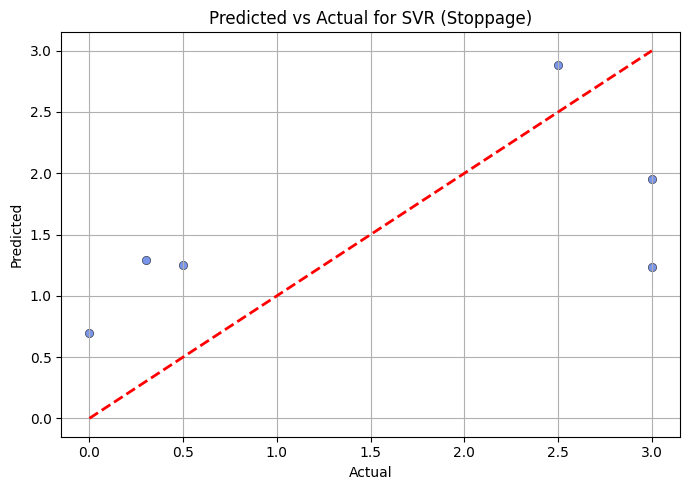


Best model for Stoppage: SVR

Recommendation based on the best model performance:
- The model's performance is weak. Consider:
  * Collecting more data.
  * Engineering additional features.
  * Trying more complex models like XGBoost.
  * Performing more detailed hyperparameter tuning.

Model: LinearRegression - Target: Waste
Mean Squared Error (MSE): 5.9054
Mean Absolute Error (MAE): 2.2997
R2 Score: -0.1890
Best Parameters: {}
--------------------------------------------------

Model: Ridge - Target: Waste
Mean Squared Error (MSE): 4.5406
Mean Absolute Error (MAE): 1.9122
R2 Score: 0.0858
Best Parameters: {'alpha': 10.0}
--------------------------------------------------

Model: Lasso - Target: Waste
Mean Squared Error (MSE): 5.0050
Mean Absolute Error (MAE): 2.0333
R2 Score: -0.0077
Best Parameters: {'alpha': 1.0}
--------------------------------------------------

Model: KNeighborsRegressor - Target: Waste
Mean Squared Error (MSE): 4.5744
Mean Absolute Error (MAE): 1.9083
R2 Score

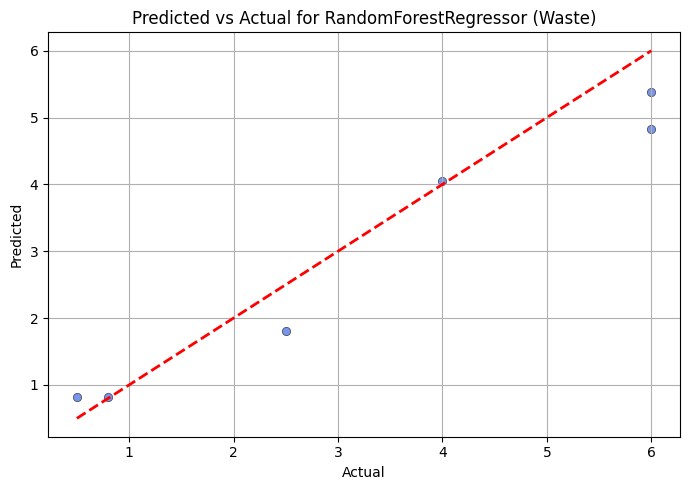

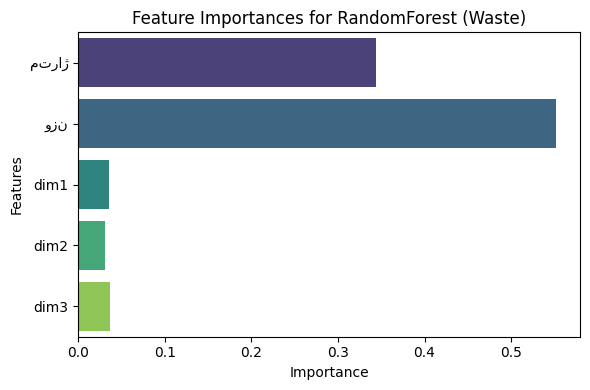


Best model for Waste: RandomForestRegressor

Recommendation based on the best model performance:
- The model performs well and can be used for prediction.


In [42]:
class PipeRegressionModel:
    def __init__(self, df):
        self.df = df.copy()
        self.scaler = StandardScaler()
        self.le = LabelEncoder()
        self.features = ['متراژ', 'وزن', 'dim1', 'dim2', 'dim3']
    
    @staticmethod
    def extract_pipe_features(pipe_name):
        try:
            parts = list(map(float, pipe_name.split('-')))
            return parts + [0] * (3 - len(parts))
        except:
            return [0, 0, 0]
    
    def prepare_data(self):
        self.df['dim1'], self.df['dim2'], self.df['dim3'] = zip(*self.df['نام لوله'].apply(self.extract_pipe_features))
        self.df['دلیل توقف_encoded'] = self.le.fit_transform(self.df['دلیل توقف'])
        X = self.df[self.features]
        X_scaled = self.scaler.fit_transform(X)
        self.X = X_scaled
        self.y_stop = self.df['توقف']
        self.y_waste = self.df['ضایعات']
    
    def plot_predictions(self, y_true, y_pred, model_name, target_name):
        plt.figure(figsize=(7,5))
        sns.scatterplot(x=y_true, y=y_pred, color='royalblue', edgecolor='k', alpha=0.7)
        plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
        plt.title(f'Predicted vs Actual for {model_name} ({target_name})')
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    
    def plot_feature_importances(self, model, target_name):
        importances = model.feature_importances_
        plt.figure(figsize=(6,4))
        sns.barplot(x=importances, y=self.features, palette='viridis')
        plt.title(f'Feature Importances for RandomForest ({target_name})')
        plt.xlabel('Importance')
        plt.ylabel('Features')
        plt.tight_layout()
        plt.show()
    
    def recommend_improvements(self, best_model_name, metrics):
        r2 = metrics['R2']
        mae = metrics['MAE']
        print("\nRecommendation based on the best model performance:")
        if r2 < 0.6:
            print(
                "- The model's performance is weak. Consider:\n"
                "  * Collecting more data.\n"
                "  * Engineering additional features.\n"
                "  * Trying more complex models like XGBoost.\n"
                "  * Performing more detailed hyperparameter tuning."
            )
        elif mae > self.df['توقف'].std():
            print(
                "- The Mean Absolute Error is high relative to data variability,\n"
                "  which may indicate noisy data or insufficient features."
            )
        else:
            print("- The model performs well and can be used for prediction.")
    
    def train_regression_models(self, X, y, target_name):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        models = {
            'LinearRegression': (LinearRegression(), {}),
            'Ridge': (Ridge(), {'alpha': [0.1, 1.0, 10.0]}),
            'Lasso': (Lasso(max_iter=10000), {'alpha': [0.01, 0.1, 1.0]}),
            'KNeighborsRegressor': (KNeighborsRegressor(), {'n_neighbors': [2,3,4], 'weights': ['uniform', 'distance']}),
            'RandomForestRegressor': (RandomForestRegressor(random_state=42), {'n_estimators': [50, 100], 'max_depth': [3,5, None]}),
            'SVR': (SVR(), {'C': [0.5, 1.0, 5.0], 'kernel': ['linear', 'rbf'], 'epsilon': [0.1, 0.2]})
        }
        
        best_model = None
        best_score = -np.inf
        best_results = None
        
        all_results = {}
        
        for name, (model, params) in models.items():
            grid = GridSearchCV(model, params, cv=3, scoring='r2', n_jobs=-1)
            grid.fit(X_train, y_train)
            
            y_pred = grid.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            
            all_results[name] = {
                'MSE': mse,
                'MAE': mae,
                'R2': r2,
                'Best Params': grid.best_params_
            }
            
            print(f"\nModel: {name} - Target: {target_name}")
            print(f"Mean Squared Error (MSE): {mse:.4f}")
            print(f"Mean Absolute Error (MAE): {mae:.4f}")
            print(f"R2 Score: {r2:.4f}")
            print(f"Best Parameters: {grid.best_params_}")
            print("-" * 50)
            
            if r2 > best_score:
                best_score = r2
                best_model = (name, grid.best_estimator_)
                best_results = all_results[name]
        
        # Plot only for best model
        y_test_pred = best_model[1].predict(X_test)
        self.plot_predictions(y_test, y_test_pred, best_model[0], target_name)
        
        if best_model[0] == 'RandomForestRegressor':
            self.plot_feature_importances(best_model[1], target_name)
        
        print(f"\nBest model for {target_name}: {best_model[0]}")
        self.recommend_improvements(best_model[0], best_results)
        
        return best_model, best_results

# -----------------
# Example usage:
# -----------------

# df = your dataframe

model_trainer = PipeRegressionModel(df)
model_trainer.prepare_data()

best_stop_model, stop_results = model_trainer.train_regression_models(model_trainer.X, model_trainer.y_stop, 'Stoppage')
best_waste_model, waste_results = model_trainer.train_regression_models(model_trainer.X, model_trainer.y_waste, 'Waste')


Training LinearRegression for target توقف ...

Model: LinearRegression - Target: توقف
Mean Squared Error (MSE): 2.9776
Mean Absolute Error (MAE): 1.5429
R2 Score: -3.0298
Best Parameters: {}
--------------------------------------------------
Training Ridge for target توقف ...

Model: Ridge - Target: توقف
Mean Squared Error (MSE): 7.9358
Mean Absolute Error (MAE): 2.4926
R2 Score: -9.7402
Best Parameters: {'alpha': np.float64(46.41588833612773)}
--------------------------------------------------
Training Lasso for target توقف ...

Model: Lasso - Target: توقف
Mean Squared Error (MSE): 6.3675
Mean Absolute Error (MAE): 2.3725
R2 Score: -7.6176
Best Parameters: {'alpha': np.float64(3.593813663804626)}
--------------------------------------------------
Training KNeighborsRegressor for target توقف ...

Model: KNeighborsRegressor - Target: توقف
Mean Squared Error (MSE): 11.7634
Mean Absolute Error (MAE): 3.0126
R2 Score: -14.9204
Best Parameters: {'weights': 'distance', 'n_neighbors': 4}
----

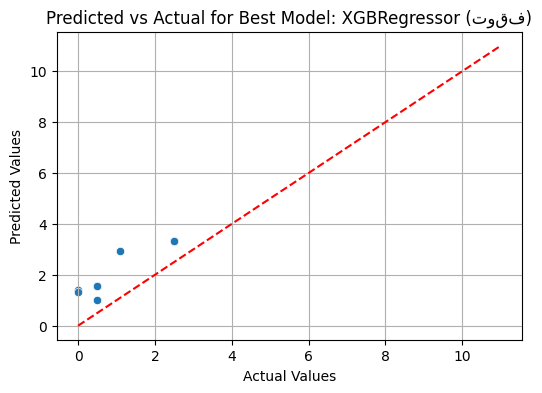

Training LinearRegression for target ضایعات ...

Model: LinearRegression - Target: ضایعات
Mean Squared Error (MSE): 4.7601
Mean Absolute Error (MAE): 1.4726
R2 Score: -0.8067
Best Parameters: {}
--------------------------------------------------
Training Ridge for target ضایعات ...

Model: Ridge - Target: ضایعات
Mean Squared Error (MSE): 4.2802
Mean Absolute Error (MAE): 1.5004
R2 Score: -0.6245
Best Parameters: {'alpha': np.float64(0.1)}
--------------------------------------------------
Training Lasso for target ضایعات ...

Model: Lasso - Target: ضایعات
Mean Squared Error (MSE): 2.0728
Mean Absolute Error (MAE): 1.2007
R2 Score: 0.2133
Best Parameters: {'alpha': np.float64(0.1668100537200059)}
--------------------------------------------------
Training KNeighborsRegressor for target ضایعات ...

Model: KNeighborsRegressor - Target: ضایعات
Mean Squared Error (MSE): 3.0555
Mean Absolute Error (MAE): 1.5079
R2 Score: -0.1597
Best Parameters: {'weights': 'distance', 'n_neighbors': 8}
----

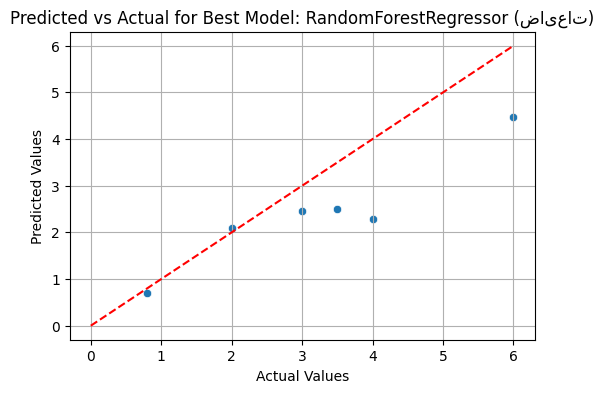

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

class PipeRegressionModel:
    def __init__(self, df):
        self.df = df.copy()
        self.le = LabelEncoder()
        self.scaler = StandardScaler()
        self.models = {
            'LinearRegression': LinearRegression(),
            'Ridge': Ridge(),
            'Lasso': Lasso(max_iter=10000),
            'KNeighborsRegressor': KNeighborsRegressor(),
            'RandomForestRegressor': RandomForestRegressor(random_state=42),
            'SVR': SVR(),
            'XGBRegressor': XGBRegressor(random_state=42, objective='reg:squarederror')
        }
        self.param_distributions = {
            'Ridge': {'alpha': np.logspace(-3, 3, 10)},
            'Lasso': {'alpha': np.logspace(-3, 1, 10)},
            'KNeighborsRegressor': {'n_neighbors': range(2, 10), 'weights': ['uniform', 'distance']},
            'RandomForestRegressor': {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 10, None]},
            'SVR': {'C': [0.1, 1, 5, 10], 'kernel': ['linear', 'rbf'], 'epsilon': [0.01, 0.1, 0.2]},
            'XGBRegressor': {'n_estimators': [50, 100, 150], 'max_depth': [3,5,7], 'learning_rate': [0.01, 0.1, 0.2]}
        }
        
    def extract_features(self):
        # Extract dims from pipe name
        def extract_pipe_features(pipe_name):
            try:
                parts = list(map(float, pipe_name.split('-')))
                return parts + [0] * (3 - len(parts))
            except:
                return [0, 0, 0]
        
        self.df['dim1'], self.df['dim2'], self.df['dim3'] = zip(*self.df['نام لوله'].apply(extract_pipe_features))
        
        # Create new features
        self.df['weight_per_length'] = self.df['وزن'] / self.df['متراژ']
        self.df['dim1_dim2'] = self.df['dim1'] * self.df['dim2']
        self.df['length_div_weight'] = self.df['متراژ'] / (self.df['وزن'] + 1e-6)  # avoid div by zero
        
        # Extract date parts (assuming Persian date YYYY/MM/DD)
        self.df['year'] = self.df['تاریخ'].str.split('/').str[0].astype(int)
        self.df['month'] = self.df['تاریخ'].str.split('/').str[1].astype(int)
        self.df['day'] = self.df['تاریخ'].str.split('/').str[2].astype(int)
        
        # Drop or keep other columns as needed
        
    def clean_data(self):
        # Remove outliers based on z-score for 'توقف' and 'ضایعات'
        from scipy.stats import zscore
        z_stop = np.abs(zscore(self.df['توقف']))
        z_waste = np.abs(zscore(self.df['ضایعات']))
        # Keep only data within 3 std dev
        mask = (z_stop < 3) & (z_waste < 3)
        self.df = self.df.loc[mask].reset_index(drop=True)
        
    def prepare_data(self, target_col):
        features = ['متراژ', 'وزن', 'dim1', 'dim2', 'dim3',
                    'weight_per_length', 'dim1_dim2', 'length_div_weight',
                    'year', 'month', 'day']
        X = self.df[features]
        y = self.df[target_col]
        X_scaled = self.scaler.fit_transform(X)
        return X_scaled, y
    
    def train_and_evaluate(self, target_col):
        X, y = self.prepare_data(target_col)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        best_model_name = None
        best_model = None
        best_score = -np.inf
        results = {}
        
        for name, model in self.models.items():
            print(f"Training {name} for target {target_col} ...")
            params = self.param_distributions.get(name, {})
            if params:
                search = RandomizedSearchCV(model, params, n_iter=20, cv=3, scoring='r2', n_jobs=-1, random_state=42)
                search.fit(X_train, y_train)
                best_estimator = search.best_estimator_
                best_params = search.best_params_
            else:
                model.fit(X_train, y_train)
                best_estimator = model
                best_params = {}
            
            y_pred = best_estimator.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            
            results[name] = {
                'MSE': mse,
                'MAE': mae,
                'R2': r2,
                'Best Params': best_params
            }
            
            print(f"\nModel: {name} - Target: {target_col}")
            print(f"Mean Squared Error (MSE): {mse:.4f}")
            print(f"Mean Absolute Error (MAE): {mae:.4f}")
            print(f"R2 Score: {r2:.4f}")
            print(f"Best Parameters: {best_params}")
            print('-'*50)
            
            if r2 > best_score:
                best_score = r2
                best_model_name = name
                best_model = best_estimator
        
        # Plot for best model only
        y_pred_best = best_model.predict(X_test)
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=y_test, y=y_pred_best)
        plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title(f'Predicted vs Actual for Best Model: {best_model_name} ({target_col})')
        plt.grid(True)
        plt.show()
        
        return best_model_name, best_model, results
model_runner = PipeRegressionModel(df)
model_runner.extract_features()
model_runner.clean_data()
best_name_stop, best_model_stop, results_stop = model_runner.train_and_evaluate('توقف')
best_name_waste, best_model_waste, results_waste = model_runner.train_and_evaluate('ضایعات')